### Hyperparameters
- input layer shape -  same as features in the X
- hidden layers -  problem specific min 1 and max unlimited
- neurons per hidden layer - problem specific
- output shape - one per class 2 for binary classification
- hidden activation -  usually ReLU (rectified linear unit)
- output activation -  sigmoid for binary, softmax for multiclass
- Loss function - cross entropy, Binary Crossentropy for binary and categorical crossentropy for multiclass
- Optimizer SGD, Adam

### Binary Classification
- two classes

In [ ]:
from sklearn.datasets import make_circles
import tensorflow as tf

In [ ]:
# make 1000 examples
n_samples = 1000

#make circles makes a dataset and its classes
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check labesl
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
X[0,1]

0.23148073787097836

##Visualizing the data

In [ ]:
import pandas as pd
circles = pd.DataFrame({
    'X0': X[:, 0],
    'X1': X[:, 1],
    'Label':y
})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


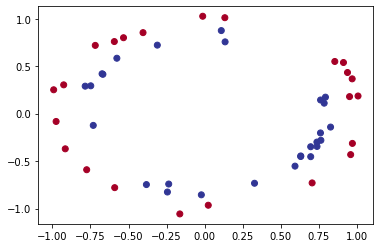

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[600:650,0], X[600:650, 1], c=y[600:650], cmap=plt.cm.RdYlBu);

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Building the first classification mode

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
     tf.keras.layers.Dense(1),
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
history = model_1.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

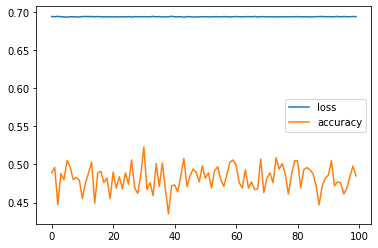

In [ ]:
pd.DataFrame(history.history).plot()

- The model is guessing

### Model 2

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4300


[0.6991420984268188, 0.4300000071525574]

## Plot the predictions
- Plot decision boundary
- takes a trined model, features and labels
- create a meshgrid of the different x values
- make predictions across the meshgrid
plot the predictions as well as a line btween the zones

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  '''
  Plots the decision bounday created by a model predicting on X
  '''
  # create the grid limits
  x_min, x_max = X[:,0].min() -  0.1, X[:,0].max() + 0.1 #X[:,0] forms the x axis (column 1)
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1 #X[:,1] forms the y axis (column2)

  #. Create a meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

  # Create values of X which we will predict
  # np stack 2D arrays together to form a X with 2 dimensions as the original x
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # make predictions
  y_pred = model.predict(x_in)
  # check for multiclass
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("binary_classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
    

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min, yy.max())

In [ ]:
x_min, x_max = X[:,0].min() -  0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

binary_classification


TypeError: ignored

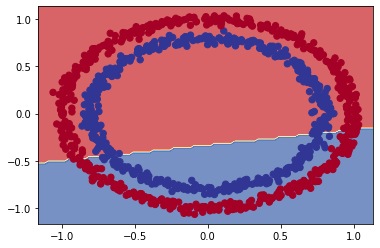

In [ ]:
plot_decision_boundary(model=model_2, X=X, y=y)

## The model is poor because it is creating a linear decision boundary
- Test if the model can be used for regression problems

In [ ]:
tf.random.set_seed(42)
x_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100, 5)

x_reg_train, x_reg_test, y_reg_train, y_reg_test = x_reg[:150], x_reg[150:], y_reg[:150], y_reg[150:]

In [ ]:
model_2.fit(x_reg_train,y_reg_train, epochs=100, verbose=0)

In [ ]:
# changing the model to fit regression

tf.random.set_seed(42)
model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics= ['mae']
)

model_3.fit(x_reg_train, y_reg_train, epochs=100, verbose=0)

In [ ]:
y_reg_pred = model_3.predict(x_reg_test)

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c='b', label = 'Training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label ="Testing data")
plt.scatter(x_reg_test, y_reg_pred, c="r", label = "Predictions")
plt.legend()



--- **Issue**
- The model is learning linear qualities but our data is non-linear


### Non-Linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
    ]
)

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ['accuracy']
)

history = model_4.fit(X, y, epochs=300, verbose=0)

In [ ]:
pd.DataFrame(history.history).plot()

## Non-Linear Activation Functions

In [ ]:
## Model 5
tf.random.set_seed(42)

model_5 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), #'relu'
     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
     
    ]
)

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_5.fit(X, y, epochs=1000, verbose=0)

In [ ]:
model_5.evaluate(X, y)

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
plot_decision_boundary(model=model_5, X=x_train, y=y_train)

### The model
- Accurate with sigmoid as the output activation 98.6%
- after 1000 epochs with one hidden layer with 4 units
#### Issue:
The model trains and tests on the X and y data sets which is not ideal to evaluate the performance of the model

-the combination of linear and non linear functions is the key fundamentals of NN

### Sigmoid Function

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use sigmoid function on sample data
A = tf.cast(tf.range(-10, 10), tf.float32)
plt.plot(A)

In [ ]:
## Transform the transformed tensor
sigm_A = sigmoid(A)
plt.plot(sigm_A)

### Relu Function

In [ ]:
# x of x is greater than 0 else 0
def relu(x):
  return tf.maximum(0,x)

# check how A behaves
relu_A = relu(A)
relu_A

In [ ]:
plt.plot(relu_A)

### Linear function

In [ ]:
linear_A = tf.keras.activations.linear(A)
print(linear_A == A)
plt.plot(linear_A)

### Improving Classification Models

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
# set seed
tf.random.set_seed(42)

# create the model
model_6 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model_6.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

history = model_6.fit(x_train, y_train, epochs=50, verbose=0)

In [ ]:
model_6.evaluate(x_test, y_test)

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Train")
plot_decision_boundary(model_6, x_train, y_train)


In [ ]:

plt.figure(figsize=(6,6))
plt.title('Test')
plot_decision_boundary(model_6, x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot(title="Model 6 loss curve")

## Finding the best learning rate
- To find the ideal learrning rate, create the callback to stop training when the result does not improve
- We can also use a modified loss curves plot

#### We want to find the learning rate where the loss decreases fastest

In [ ]:
 ## Creating model 7
 tf.random.set_seed(42)

 model_7 = tf.keras.Sequential(
     [
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
     ]
 )

 model_7.compile(
     loss = "binary_crossentropy",
     optimizer='Adam',
     metrics=['accuracy']
 )

 # create a learning rate callback
 lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

 #Fit the model with scheduler
 history_7 = model_7.fit(
     x_train,
     y_train,
     epochs=100,
     callbacks=[lr_scheduler],
     verbose=0
 )

In [ ]:
pd.DataFrame(history_7.history).plot(xlabel="epochs")

In [ ]:
## Plotting learning rate against the loss
lrs = 1e-4 * 10**(tf.range(100)/20)
lrs

In [ ]:
plt.semilogx(lrs, history_7.history['loss'])
plt.xlabel("learning rate")
plt.xlabel('loss')
plt.title("Learning rate vs Loss")

### Conclusions
- the  best learning rate is the lr at which the loss decreases most, which is appr. 0.01

### Evaluation of metrics

- **False positive** -  when the model shows positive for something that is actually negative
- **False negative** -  when the models shows negative for something that is actucally negative. No Covid19 when Covid is positive

- **accuracy**  = (tp+tn) / (tp+tn+fn+fp) **->** tf.keras.metrics.Accuracy(), sklearn.metrics.accuracy_score()
- **Precision** = tp / (tp +fp) **->** tf.keras.metrics.Precision() - higher precision results into less false positives, sklearn.metrics.precision_score(). leads to less false positives
- **Recall** = tp / (tp + fn) **->** tf.keras.metrics.Recall(), sklearn.metrics.recall_score() -  leads to less false negatives
- **F1-Score** =  2.(precision.recall) / (precision + recall) ->. sklearn.metrics.f1_score()
- **Confusion Matrix** - when comparing the predictions to the true values to see where the model gets confused
### Trade off
- You cannot have both precision and recall high

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(lr=0.02),
    metrics = ['accuracy']
)

model_8.fit(x_train, y_train, epochs=50, verbose=0)

In [ ]:
loss, accuracy = model_8.evaluate(x_test, y_test)
print(f"Model loss of the test set: {loss}")
print(f"Model accuracy of the test test {accuracy * 100}%")

### confusion Matrices
- a matrix of True Label against the Predicted labels
- On the diagonal are true positive and true negative
- On the bottom left are false negatives
- On top right are false positives

In [ ]:
y_pred = model_8.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
y_pred[:10], y_test[:10]

- The output values are in. probability values
- Tune to 1 for all above .5

### Good confusion Matrix


In [ ]:
rounded_y_pred = tf.round(y_pred)

In [ ]:
confusion_matrix(y_test, rounded_y_pred)

### Ploting the confusion matrix

In [ ]:
from itertools import product
from sklearn.metrics import confusion_matrix

def confusion_matrix_plot(y_true, y_pred, classes=None, figsize=(10,10), text_size=12):
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] ## Normalize the confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will show how correct the predictions are
  fig.colorbar(cax)

  # Set the labels to categories if they exist otherwise just numbers
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  #Plot the test on each cell
  for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

### Multiclass classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

- The data is 28 x 28 tensors of values from 0 to 255 : an array of arrays: 28 items in the array, 28 arrays in the bigger array
- Labels are single digits

**Label	Description**
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot


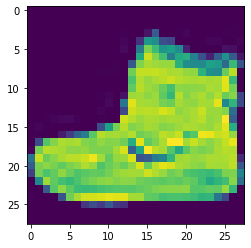

In [ ]:
## Plotting a label
# label 9 is ankle boot
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
class_names = [
'T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot'
]

In [ ]:
def plot_sample(index):
  plt.figure(figsize=(5,5))
  plt.imshow(train_data[index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[index]])



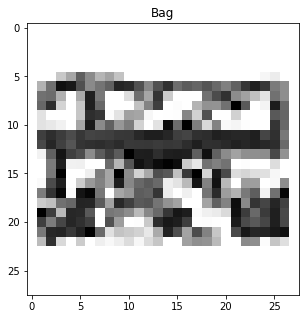

In [ ]:
plot_sample(10000)

### Visualize the data randomly

In [ ]:
import random
def plot_random_samples():
  plt.figure(figsize=(7,7))
  for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(str(rand_index) + " " +class_names[train_labels[rand_index]])
    plt.axis(False)

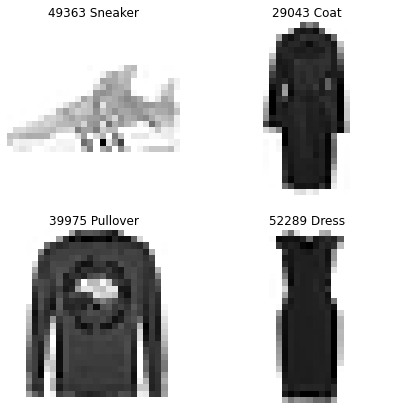

In [ ]:
plot_random_samples()

### Building multiclass Classification model
* input shape 28x28
* Output shape 10 one per class of clothing
* Loss function tf.keras.losses.CategoricalCrossentropy
* Output layer activation - Softmax

In [ ]:
## If you run into shape issue, you want to flatten the input
flattened = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flattened.output_shape

(None, 784)

**NOTE: from docs**
* Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation. 
* If you want to provide labels as integers, please use **SparseCategoricalCrossentropy** loss. 

* You can pass the train labels as *tf.one_hot(train_labels)*


In [ ]:
## set random
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (28,28)), # Introduce a flatten layer, to change input shape from 2d to 1d
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ]
)

# compile the model
model_9.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

#Fit the model
history_unnormalized = model_9.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels) # evaluate the model
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
model_9.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### NN tend to prefer normalization
-  make all values between 0 and 1 -> divide all by max

In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [ ]:
# create a model for the new normalized data
tf.random.set_seed(42)

model_10 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model_10.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), # instead of sparse then we parse one hot encoded training data
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_normalized = model_10.fit(
    train_data_norm,
    train_labels,
    epochs = 10,
    validation_data=(test_data_norm, test_labels)
    )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

- NN work well with numerical data and with normalized data
- Accuracy increased drastically by just normalizing data

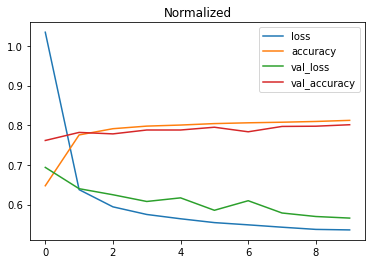

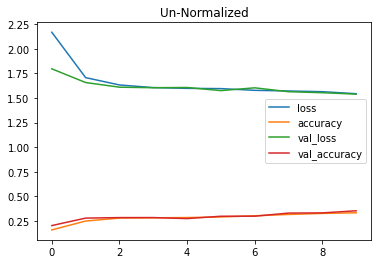

In [ ]:
import pandas as pd

pd.DataFrame(history_normalized.history).plot(title="Normalized")
pd.DataFrame(history_unnormalized.history).plot(title="Un-Normalized")

### finding ideal lr for multiclass classification

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model_11.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_11.fit(
    train_data_norm,
    train_labels,
    epochs=50,
    validation_data = (test_data_norm, test_labels),
    callbacks=[lr_scheduler])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

### Plotting the LR decay curve to show where loss drops fastest

Text(0.5, 1.0, 'Find the ideal learning rate')

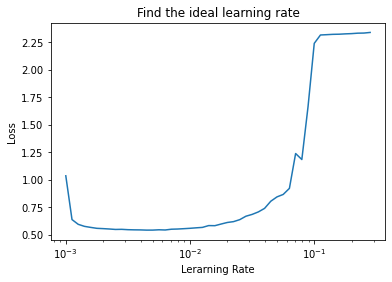

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10 **(tf.range(50)/20)
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Lerarning Rate')
plt.ylabel('Loss')
plt.title('Find the ideal learning rate')

- Lowest  point is on lr 1e-3
### making the ideal learning rate

In [ ]:
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(10, activation='relu'),
     tf.keras.layers.Dense(10, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# Compile the model
model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=1e-3),
    metrics = ['accuracy']
)

# Fit the model
history_12 = model_12.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data = (test_data_norm, test_labels),
    verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_12.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8562


[0.4053989350795746, 0.8561999797821045]

### Evaluating Multiclass Classification Model

In [ ]:
## Create a confusion Matrix
y_probs = model_12.predict(test_data_norm)
class_names[tf.argmax(y_probs[4])]

'Shirt'

### using Argmax to get the probabilities to match labels

In [ ]:
## convert all the predictions probabilitis  to integers
y_preds = y_probs.argmax(axis=1) # return only the max as a an array
y_preds[:10], test_labels[:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

### Creating The confusion matrix

In [ ]:
confusion_matrix(test_labels, y_preds)

array([[804,   5,  11,  40,   4,   0, 121,   0,  15,   0],
       [  1, 963,   1,  27,   2,   0,   5,   0,   1,   0],
       [ 18,   6, 716,  14, 147,   0,  94,   0,   5,   0],
       [ 26,  19,   5, 848,  53,   0,  44,   0,   5,   0],
       [  0,   1,  83,  22, 824,   0,  67,   0,   3,   0],
       [  0,   0,   0,   1,   0, 950,   0,  31,   2,  16],
       [130,   2, 106,  36,  77,   1, 632,   1,  15,   0],
       [  0,   0,   0,   0,   0,  26,   0, 956,   0,  18],
       [  2,   0,   4,   9,   5,   5,  27,   4, 942,   2],
       [  0,   1,   0,   0,   0,  13,   1,  56,   2, 927]])

In [ ]:
confusion_matrix_plot(
    y_true=test_labels,
    y_pred=y_preds,
    classes=class_names
)

ValueError: ignored

## Create a function that takes an image, plots it, and predicts it using our model.

In [ ]:
def plot_random_image(model, images, true_labels, classes):
  # set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary) # black n white

  # change the color of title depending on the correctness of prediction
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information 
  plt.xlabel("Pred:{} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)


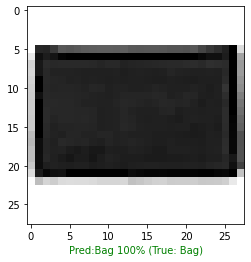

In [ ]:
plot_random_image( model=model_12, images=test_data_norm,true_labels=test_labels, classes=class_names)

## What patterns is our model learning

In [ ]:
model_12.layers

In [ ]:
model_12.layers[1]

In [ ]:
weights,biases = model_12.layers[1].get_weights()

In [ ]:
weights, weights.shape

(array([[ 0.02861048,  0.49231774, -0.6461981 , ..., -0.44802824,
          0.17938308,  0.01048556],
        [-0.32982856, -0.6296206 , -0.51429737, ..., -0.62315226,
          0.7416752 ,  0.20723109],
        [-0.32683304, -0.4889338 , -0.917645  , ..., -0.91434664,
          0.76605934, -0.42290857],
        ...,
        [ 0.08513062, -0.7228847 , -0.15577519, ...,  0.1039302 ,
          0.21827371, -0.05047444],
        [-0.07292338, -0.64755213, -0.55015254, ...,  0.76369214,
         -0.05744345,  0.0318126 ],
        [ 0.22518682, -0.5509408 , -0.08413997, ...,  0.00401967,
          0.16752778, -0.38827077]], dtype=float32), (784, 10))

In [ ]:
biases, biases.shape

(array([ 1.5225048 ,  0.4693422 ,  0.16759671,  1.0068362 ,  0.3991603 ,
         0.62698054,  0.27410376,  0.03104889,  0.47846124, -0.38367793],
       dtype=float32), (10,))

- every neuron has a bias vector. each of these is paired with a weights matrix
- the bias vector get initialized as zeroes for Dense layer
- The bias vector dictates how much the patter with the corresponding weights matrix should influence the next layer

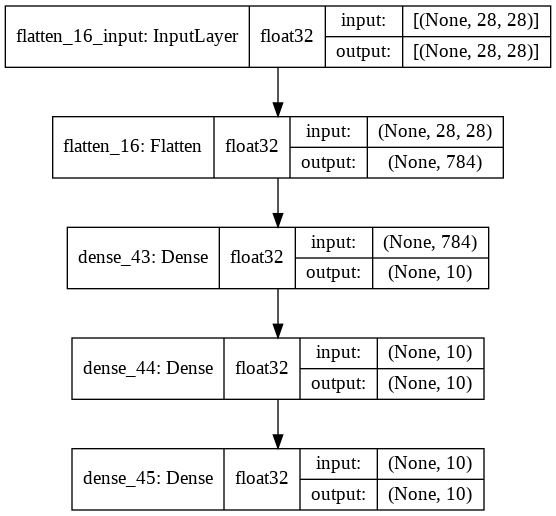

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_12, show_dtype=True, show_shapes=True)

### Exercises

In [ ]:
# Make  dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[:,0]

array([[ 1.60646963, -0.29510666],
       [-0.01573879,  0.99987614],
       [ 0.58114423,  0.81380058],
       ...,
       [ 0.85881829, -0.4899837 ],
       [ 0.87129459, -0.49168287],
       [ 0.28956227, -0.20376007]])

In [ ]:
X.min()

-1.0

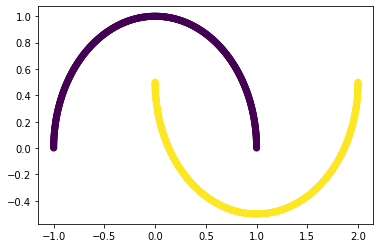

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y)


In [ ]:
## build a model for classifiction
tf.random.set_seed(42)

# create the model
model_e = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10, activation='relu'),
     tf.keras.layers.Dense(10, activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

# Compile the model
model_e.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = 'adam',
    metrics = ['accuracy']
)

# fit model
history_e = model_e.fit(
    x_train,
    y_train,
    epochs=100,
)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7758 - accuracy: 0.5107
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.5173
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.5333
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.5627
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.6160
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5332 - accuracy: 0.7280
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.8173
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.8360
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.8533
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8613
Epoch 11/

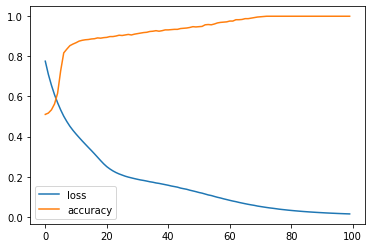

In [ ]:
pd.DataFrame(history_e.history).plot()

In [ ]:
model_e.evaluate(x_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 1.0000


[0.015712764114141464, 1.0]

In [ ]:
y_e_pred = model_e.predict(x_test)


### Model for the Fashio Mnist

In [ ]:
# set seed
tf.random.set_seed(42)

#create model
model_13 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# compile the model
model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=1e-3),
    metrics = ['accuracy']
)

# fit the model
history_13 = model_13.fit(
    train_data_norm,
    train_labels,
    epochs=100,
    verbose=0,
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


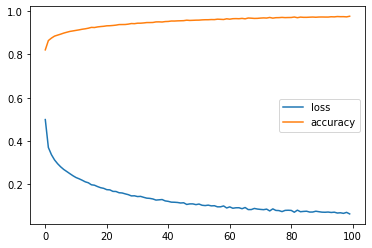

In [ ]:
pd.DataFrame(history_13.history).plot()

In [ ]:
model_13.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.8826 - accuracy: 0.8868


[0.8825888633728027, 0.8867999911308289]

In [ ]:
y_preds = model_13.predict()

## Normalized exponential function -  Softmax

In [ ]:
def softmax(x):
  # e^x / Sum(e^x)
  sumx = tf.reduce_sum(tf.exp(x))
  return tf.exp(x) / sumx

tx = tf.constant([1.,2.,3.,4.])
softmax(tx)


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.0320586 , 0.08714432, 0.23688282, 0.6439142 ], dtype=float32)>